In [1]:
import numpy as np
import ROOT as root
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math

from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import matplotlib as mpl
from scipy.interpolate import interp1d

Welcome to JupyROOT 6.16/00


### Read Signal shapes from files: 

In [2]:
data_FbK = np.loadtxt('/home/andrii/work/terzina/terzina/waveform_sim/NUV_HD_template_email.txt', dtype=float, comments='#', delimiter = ' ')

In [3]:
data_measured = np.loadtxt('/home/andrii/work/terzina/terzina/waveform_sim/NUV_HD_6x6_75NC_Miteq.out', dtype=float, comments='#', delimiter = ' ')

In [4]:
data_LCT5NUV = np.loadtxt('/home/andrii/work/terzina/terzina/waveform_sim/LCT5_NUV_Template_Miteq.txt', dtype=float, comments='#', delimiter = ' ')

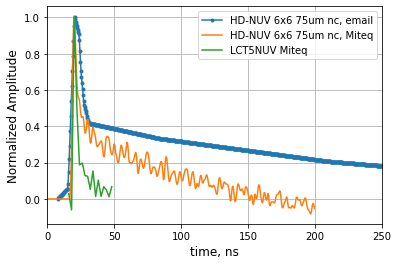

In [5]:
a_max = np.max(data_FbK[:,1])

plt.plot(data_FbK[:,0] + 8, data_FbK[:,1]/a_max, '.-', label = 'HD-NUV 6x6 75um nc, email')
plt.plot(data_measured[:,0], data_measured[:,1], '-', label = 'HD-NUV 6x6 75um nc, Miteq')
plt.plot(data_LCT5NUV[:,0] + 10, data_LCT5NUV[:,1], '-', label = 'LCT5NUV Miteq')
plt.grid()
plt.xlim(0.0, 250)
plt.legend()
plt.xlabel("time, ns", fontsize=12)
plt.ylabel("Normalized Amplitude", fontsize=12)
plt.savefig('signal_shapes.pdf')

0.39078350448943616


IndexError: index 0 is out of bounds for axis 0 with size 0

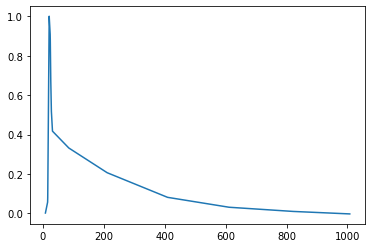

In [15]:
fwhm_6x6_50us_epoxy, tau_6x6_50us_epoxy = get_fwhm([data_test[:,0] + 8, data_test[:,1]/a_max])

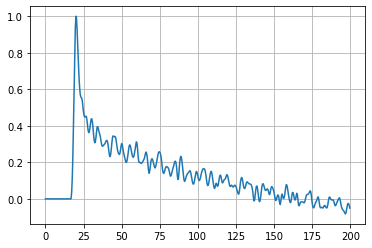

In [9]:
plt.plot(data_measured[:,0], data_measured[:,1], '-')
plt.grid()

In [35]:
x = data_test[:,0]
y = data_test[:,1]

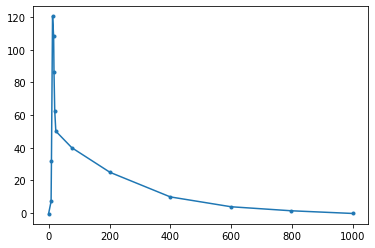

In [71]:
plt.plot(x, y, '.-')

In [40]:
f2_shape = interp1d(x, y, kind='linear')

In [72]:
x_time = np.arange(0, 1000, 0.4)

(0.0, 30.0)

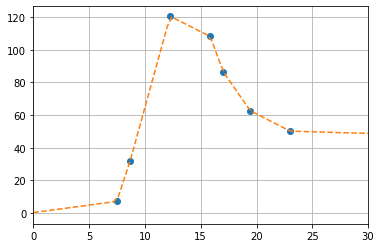

In [73]:
plt.plot(data_test[:,0], data_test[:,1], 'o')
plt.plot(x_time, f2_shape(x_time), '--')
plt.grid()
plt.xlim(0.0, 30)

In [74]:
max_amplitude = np.max(f2_shape(x_time))

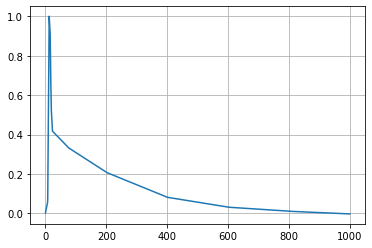

In [75]:
plt.plot(x_time, f2_shape(x_time)/max_amplitude, '-')
plt.grid()

In [51]:
np.savetxt('test.out', (x_time*1.e-9, f2_shape(x_time)), newline='\n')

In [77]:
data_out = np.zeros([len(x_time), 2])

In [78]:
data_out[:, 0] = x_time
data_out[:, 1] = f2_shape(x_time)/max_amplitude

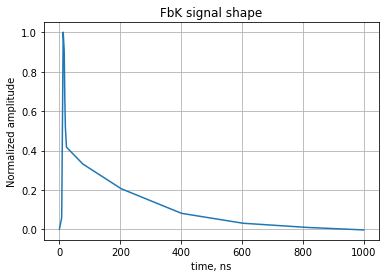

In [85]:
plt.plot(data_out[:, 0], data_out[:, 1], '-')
plt.grid()
plt.title('FbK signal shape')
plt.ylabel('Normalized amplitude')
plt.xlabel('time, ns')
plt.savefig('Signal_shape.png', dpi = 200)

In [84]:
np.savetxt('NUV_HD_template.out', data_out, newline='\n')

In [62]:
data_sst1m = np.loadtxt('/home/andrii/work/DoAna/DoCalcNSB/v8_ChargResol/TemplateOutYvesNew.txt', dtype=float, comments='#', delimiter = '	')

(0.0, 50.0)

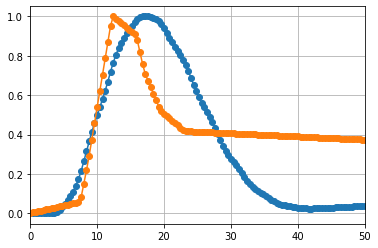

In [83]:
plt.plot(data_sst1m[:, 0], data_sst1m[:, 1], 'o-')
plt.plot(data_out[:, 0], data_out[:, 1], 'o-')
plt.grid()
plt.xlim(0.0, 50)

In [2]:
file_3x3mm_40um_epoxy = '/mnt_data/data/FbK_Terzina/teplates/3x3mm_40um_epoxy_template.root'
file_3x3mm_40um = '/mnt_data/data/FbK_Terzina/teplates/3x3mm_40um_template.root'

file_6x6mm_50um_epoxy = '/mnt_data/data/FbK_Terzina/teplates/6x6mm_50um_epoxy_template.root'
file_6x6mm_50um = '/mnt_data/data/FbK_Terzina/teplates/6x6mm_50um_template.root'

file_6x6mm_60um_epoxy = '/mnt_data/data/FbK_Terzina/teplates/6x6mm_60um_epoxy_template.root'
file_6x6mm_60um = '/mnt_data/data/FbK_Terzina/teplates/6x6mm_60um_template.root'

file_6x6mm_75um_epoxy = '/mnt_data/data/FbK_Terzina/teplates/6x6mm_75um_epoxy_template.root'
file_6x6mm_75um = '/mnt_data/data/FbK_Terzina/teplates/6x6mm_75um_template.root'

In [3]:
def get_template(file):
    
    if file.find('.root') != -1:
        f = root.TFile(file)
        myTree = f.Get("T")
        
        for entry_num in range (0 , myTree.GetEntries ()):
            myTree.GetEntry(entry_num)
            
            amplitude = np.array(list(myTree.VTemplate))
            
    return amplitude
        
    

In [4]:
amplitude_3x3mm_40um_epoxy = get_template(file_3x3mm_40um_epoxy)
amplitude_3x3mm_40um = get_template(file_3x3mm_40um)

amplitude_6x6mm_50um_epoxy = get_template(file_6x6mm_50um_epoxy)
amplitude_6x6mm_50um = get_template(file_6x6mm_50um)

amplitude_6x6mm_60um_epoxy = get_template(file_6x6mm_60um_epoxy)
amplitude_6x6mm_60um = get_template(file_6x6mm_60um)

amplitude_6x6mm_75um_epoxy = get_template(file_6x6mm_75um_epoxy)
amplitude_6x6mm_75um = get_template(file_6x6mm_75um)

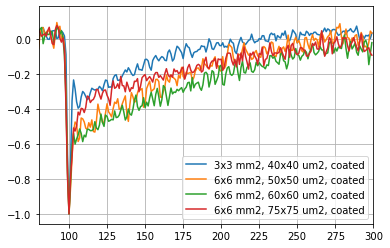

In [5]:
time = np.arange(0,len(amplitude_3x3mm_40um_epoxy),1)


plt.plot(time, amplitude_3x3mm_40um_epoxy, label='3x3 mm2, 40x40 um2, coated')
#plt.plot(time, amplitude_3x3mm_40um, label='3x3 mm2, 40x40 um2, nc ')
plt.grid()
plt.xlim(80, 300)
plt.legend()
#plt.show()

plt.plot(time, amplitude_6x6mm_50um_epoxy, label='6x6 mm2, 50x50 um2, coated')
#plt.plot(time, amplitude_6x6mm_50um, label='6x6 mm2, 50x50 um2, nc')
plt.plot(time, amplitude_6x6mm_60um_epoxy, label='6x6 mm2, 60x60 um2, coated')
#plt.plot(time, amplitude_6x6mm_60um, label='6x6 mm2, 60x60 um2, nc')

plt.plot(time, amplitude_6x6mm_75um_epoxy, label='6x6 mm2, 75x75 um2, coated')
#plt.plot(time, amplitude_6x6mm_75um, label='6x6 mm2, 75x75 um2, nc')


plt.grid()
plt.xlim(80, 300)
plt.legend()
plt.grid()
plt.show()

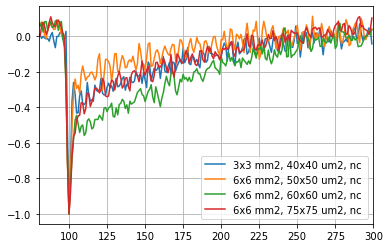

In [6]:
#plt.plot(time, amplitude_3x3mm_40um_epoxy, label='3x3 mm2, 40x40 um2, coated')
plt.plot(time, amplitude_3x3mm_40um, label='3x3 mm2, 40x40 um2, nc ')
plt.grid()
plt.xlim(80, 300)
plt.legend()
#plt.show()

#plt.plot(time, amplitude_6x6mm_50um_epoxy, label='6x6 mm2, 50x50 um2, coated')
plt.plot(time, amplitude_6x6mm_50um, label='6x6 mm2, 50x50 um2, nc')
#plt.plot(time, amplitude_6x6mm_60um_epoxy, label='6x6 mm2, 60x60 um2, coated')
plt.plot(time, amplitude_6x6mm_60um, label='6x6 mm2, 60x60 um2, nc')

#plt.plot(time, amplitude_6x6mm_75um_epoxy, label='6x6 mm2, 75x75 um2, coated')
plt.plot(time, amplitude_6x6mm_75um, label='6x6 mm2, 75x75 um2, nc')


plt.grid()
plt.xlim(80, 300)
plt.legend()
plt.grid()
plt.show()

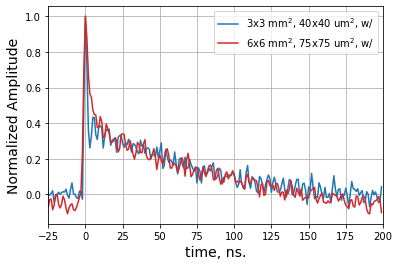

In [23]:
#plt.plot(time, -amplitude_3x3mm_40um_epoxy, '-', label='3x3 mm2, 40x40 um2, coated', c = 'tab:blue')
plt.plot(time - 100, -amplitude_3x3mm_40um, '-', label='3x3 mm$^2$, 40x40 um$^2$, w/ ', c = 'tab:blue')


#plt.plot(time, -amplitude_6x6mm_50um_epoxy, '-', label='6x6 mm2, 50x50 um2, coated', c = 'tab:orange')
#plt.plot(time, -amplitude_6x6mm_50um, '.--', label='6x6 mm2, 50x50 um2, nc', c = 'tab:orange')

#plt.plot(time, -amplitude_6x6mm_60um_epoxy, '-', label='6x6 mm2, 60x60 um2, coated', c = 'tab:green')
#plt.plot(time, -amplitude_6x6mm_60um, '.--', label='6x6 mm2, 60x60 um2, nc', c = 'tab:green')

#plt.plot(time, -amplitude_6x6mm_75um_epoxy, '-', label='6x6 mm2, 75x75 um2, coated', c = 'tab:red')
plt.plot(time - 100, -amplitude_6x6mm_75um, '-', label='6x6 mm$^2$, 75x75 um$^2$, w/', c = 'tab:red')

plt.xlim(-25, 200)
plt.legend()
plt.grid()

plt.ylabel('Normalized Amplitude', fontsize=14)
plt.xlabel('time, ns.', fontsize=14)

plt.savefig('pulse_template.png', dpi = 300)

#plt.savefig('rate_all_pixel.png', dpi = 200)

plt.show()


In [14]:
Nuv_6x6_50_cn = interp1d(time, -amplitude_6x6mm_50um_epoxy, kind='cubic')

time_interpolite = np.arange(0, 125, 0.1)

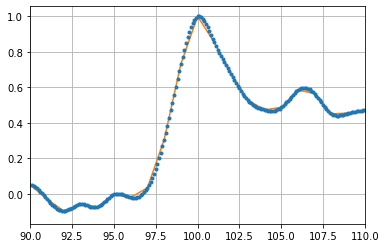

In [18]:
plt.plot(time, -amplitude_6x6mm_50um_epoxy, '-', label='6x6 mm2, 50x50 um2, coated', c = 'tab:orange')
plt.plot(time_interpolite, Nuv_6x6_50_cn(time_interpolite), '.')
plt.xlim(90, 110)
plt.grid()

In [22]:

for index, amplitude in enumerate(Nuv_6x6_50_cn(time_interpolite)) :
    if amplitude == 0.5 or (  )
    print(i_amplitude)

0.0
0.0011993372758493947
0.0027283500614815955
0.004558818959312029
0.00666252457175612
0.009011247501229298
0.011576768350146992
0.014330867720924621
0.017245326215977623
0.020291924437721418
0.02344244298857143
0.026668662470943096
0.029942363487251846
0.03323532663991308
0.03651933253134225
0.03976616176395478
0.042947594940166096
0.046035412662391625
0.049001395533046783
0.05181732415454701
0.054454979129307725
0.05688331328448548
0.05905996834620119
0.060939758265316946
0.0624774969926948
0.06362799847919677
0.06434607667568497
0.06458654553302141
0.06430421900206819
0.06345391103368733
0.06199043557874093
0.059897671906387666
0.05727576055897294
0.05425390739713881
0.05096131828152733
0.04752719907278055
0.044080755631540514
0.040751193818449286
0.037667719494148905
0.03495953851928143
0.03275585675448893
0.031146523206406374
0.0300639594656406
0.029401230268791337
0.029051400352458352
0.028907534453241394
0.028862697307740225
0.0288099536525546
0.028642368224284263
0.0282530057

In [23]:
from scipy.interpolate import UnivariateSpline

In [32]:
spline = UnivariateSpline(time, -amplitude_6x6mm_50um_epoxy)
r1, r2 = spline.roots() # find the roots

In [33]:
r1

25.680873680363636

In [34]:
r2

269.4324400335225

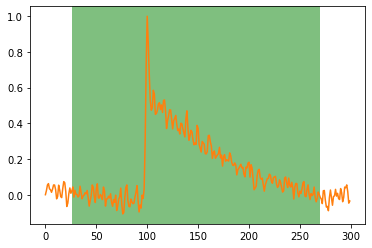

In [35]:
plt.plot(time, -amplitude_6x6mm_50um_epoxy, '-', label='6x6 mm2, 50x50 um2, coated', c = 'tab:orange')
plt.axvspan(r1, r2, facecolor='g', alpha=0.5)

In [7]:
from scipy.signal import chirp, find_peaks, peak_widths

import matplotlib.pyplot as plt
plt.plot(time, -amplitude_6x6mm_50um_epoxy, '-', label='6x6 mm2, 50x50 um2, coated', c = 'tab:orange')

peaks, _ = find_peaks(-amplitude_6x6mm_50um_epoxy, height = 0.9)

results_half = peak_widths(-amplitude_6x6mm_50um_epoxy, peaks, rel_height=0.5)
results_half[0]

plt.plot(peaks, -amplitude_6x6mm_50um_epoxy[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
plt.grid()
plt.xlim(90, 110)

NameError: name 'time' is not defined

In [44]:
results_half[0]

array([9.60685222])

In [1]:
def get_fwhm(data):
    
    baseline = np.mean(data[1][data[0]<90])
    print(baseline)
    plt.plot(data[0], data[1], '-', label='pulse shape')
    
    y_data = data[1] - baseline
    
    peaks, _ = find_peaks(y_data, height = 0.9*np.max(data[1]))
    
    results_full = peak_widths(y_data, peaks, rel_height=1)
    
    results_half = peak_widths(y_data, peaks, rel_height=0.5 + 0.5*results_full[1][0])

    #plt.plot(peaks, data[1][peaks], "xr")
    plt.hlines(*results_half[1:], color="black", label='FWHM')
    #plt.hlines(*results_full[1:], color="C3")
    print(results_full[1][0])
    
    x_fit = data[0][data[0]>110]
    y_fit = data[1][data[0]>110]

    popt, pcov = curve_fit(func, x_fit, y_fit, [1.5, 0.01])
    plt.plot(x_fit, func(x_fit, *popt), 'r--', label='recovery $\u03C4$ fit')
    
    tau = 1./popt[1]
    
    plt.grid()
    
    print(results_half[0][0], ' ', tau)
    #plt.xlim(80, 300)
    #plt.ylim(0.3, 0.6)
    plt.legend()
    plt.ylabel('Normalized Amplitude', fontsize=14)
    plt.xlabel('time, ns', fontsize=14)
    plt.savefig('pulse_fit_example.pdf', dpi = 200)
    
    return results_half[0][0], tau

-0.003353614469770216
-0.08646892400722805
5.010986422803811   58.19788705096617


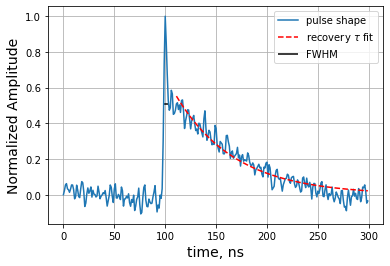

In [286]:
fwhm_6x6_50us_epoxy, tau_6x6_50us_epoxy = get_fwhm([time, -amplitude_6x6mm_50um_epoxy])

3.01983461556226   37.262095418127956
9.606852224545179   58.19788705096617
18.28842608933411   83.68926918463674
7.019094389944286   82.1642411788696


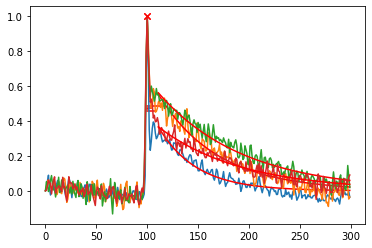

In [131]:
fwhm_3x3_40us_epoxy, tau_3x3_40us_epoxy = get_fwhm([time, -amplitude_3x3mm_40um_epoxy])
fwhm_6x6_50us_epoxy, tau_6x6_50us_epoxy = get_fwhm([time, -amplitude_6x6mm_50um_epoxy])
fwhm_6x6_60us_epoxy, tau_6x6_60us_epoxy = get_fwhm([time, -amplitude_6x6mm_60um_epoxy])
fwhm_6x6_75us_epoxy, tau_6x6_75us_epoxy = get_fwhm([time, -amplitude_6x6mm_75um_epoxy])

3.01983461556226

2.8527053907035764   61.88617713486173
3.811759959465448   44.97914032526235
5.850312794159834   70.22124814405048
8.536183491014043   52.23834057931529


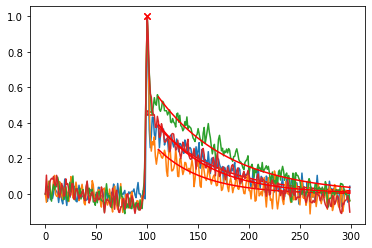

In [130]:
fwhm_3x3_40us, tau_3x3_40us = get_fwhm([time, -amplitude_3x3mm_40um])
fwhm_6x6_50us, tau_6x6_50us = get_fwhm([time, -amplitude_6x6mm_50um])
fwhm_6x6_60us, tau_6x6_60us = get_fwhm([time, -amplitude_6x6mm_60um])
fwhm_6x6_75us, tau_6x6_75us = get_fwhm([time, -amplitude_6x6mm_75um])

In [132]:
pixel_size = [40, 50, 60, 75]
fwhm_epoxy = [fwhm_3x3_40us_epoxy, fwhm_6x6_50us_epoxy, fwhm_6x6_60us_epoxy, fwhm_6x6_75us_epoxy]
fwhm = [fwhm_3x3_40us, fwhm_6x6_50us, fwhm_6x6_60us, fwhm_6x6_75us]

tau_epoxy = [tau_3x3_40us_epoxy, tau_6x6_50us_epoxy, tau_6x6_60us_epoxy, tau_6x6_75us_epoxy]
tau = [tau_3x3_40us, tau_6x6_50us, tau_6x6_60us, tau_6x6_75us]

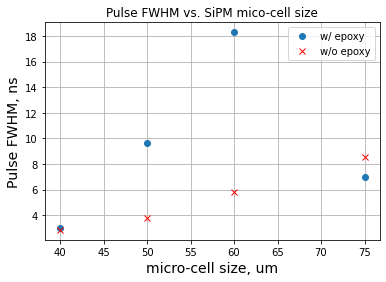

In [149]:
plt.plot(pixel_size, fwhm_epoxy, 'o', label='w/ epoxy')
plt.plot(pixel_size, fwhm, 'xr', label='w/o epoxy')
plt.grid()
plt.legend()

plt.title('Pulse FWHM vs. SiPM mico-cell size')
plt.ylabel('Pulse FWHM, ns', fontsize=14)
plt.xlabel('micro-cell size, um', fontsize=14)
plt.savefig('pulse_FWHM.pdf', dpi = 200)

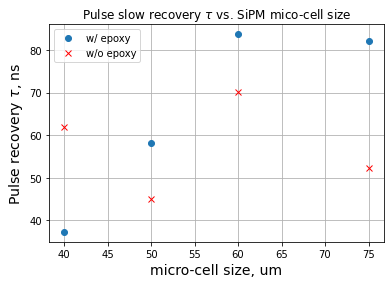

In [150]:
plt.plot(pixel_size, tau_epoxy, 'o', label='w/ epoxy')
plt.plot(pixel_size, tau, 'xr', label='w/o epoxy')
plt.grid()
plt.legend()
plt.title('Pulse slow recovery $\u03C4$ vs. SiPM mico-cell size')
plt.ylabel('Pulse recovery $\u03C4$, ns', fontsize=14)
plt.xlabel('micro-cell size, um', fontsize=14)
plt.savefig('pulse_recovery.pdf', dpi = 200)

In [69]:
def func(x, a, b):
    return a * np.exp(-b*x)

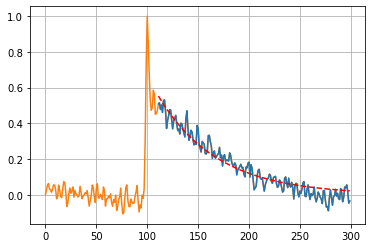

In [89]:
x_fit = time[time>110]
y_fit = -amplitude_6x6mm_50um_epoxy[time>110]


plt.plot(time, -amplitude_6x6mm_50um_epoxy, '-', label='6x6 mm2, 50x50 um2, coated', c = 'tab:orange')
plt.plot(x_fit, y_fit)
plt.grid()

popt, pcov = curve_fit(func, x_fit, y_fit, [1.5, 0.01])

plt.plot(x_fit, func(x_fit, *popt), 'r--')

In [94]:
1/popt[1]

58.19788705096617

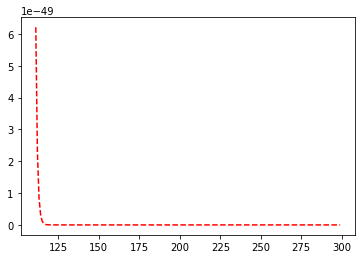

In [73]:
plt.plot(x_fit, func(x_fit, 1, 1), 'r--')

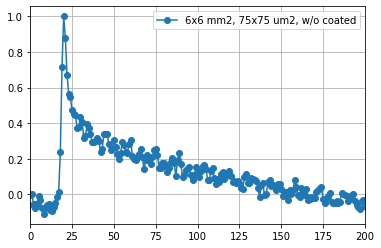

In [162]:
plt.plot(time - 80, -amplitude_6x6mm_75um, 'o-', label='6x6 mm2, 75x75 um2, w/o coated')

plt.xlim(0, 200)
plt.legend()
plt.grid()
plt.show()

In [165]:
Nuv_6x6_75_cn = interp1d(time - 80, -amplitude_6x6mm_75um, kind='cubic')

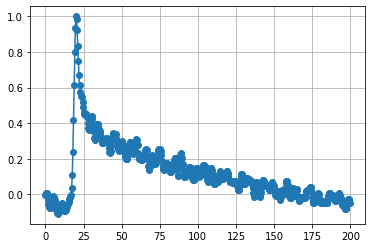

In [202]:
time_interpol = np.arange(0, 200, 0.4)
plt.plot(time_interpol, Nuv_6x6_75_cn(time_interpol), 'o-')
plt.grid()
plt.show()

In [204]:
data_out = np.zeros([len(time_interpol), 2])

data_out[:, 0] = time_interpol
data_out[:, 1] = Nuv_6x6_75_cn(time_interpol)

In [205]:
len(time_interpol)

500

In [206]:
data_out[data_out[:,0]<17, 1] = 0.

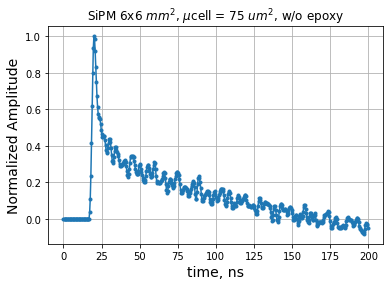

In [215]:
plt.plot(data_out[:, 0], data_out[:, 1], '.-')
plt.grid()
plt.title('SiPM 6x6 $mm^2$, $\mu$cell = 75 $um^2$, w/o epoxy')
plt.ylabel('Normalized Amplitude', fontsize=14)
plt.xlabel('time, ns', fontsize=14)
#plt.xlim(0.0, 20.e-9)
plt.savefig('pulse_for_simulation.png', dpi = 200)

In [208]:
np.savetxt('nuv_6x6_75nc.out', data_out, newline='\n')

In [292]:
data_test_1 = np.loadtxt('/home/andrii/work/DoAna/DoCalcNSB/v8_Terzina/NUV_HD_template.txt', dtype=float, comments='#', delimiter = ' ')
data_test_2 = np.loadtxt('/home/andrii/work/DoAna/DoCalcNSB/v8_Terzina/nuv_6x6_75nc.out', dtype=float, comments='#', delimiter = ' ')

(0.0, 200.0)

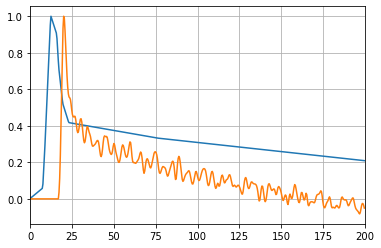

In [297]:
plt.plot(data_test_1[:,0], data_test_1[:,1])
plt.plot(data_test_2[:,0], data_test_2[:,1])
plt.grid()
plt.xlim(0.0, 200)